<a href="https://colab.research.google.com/github/Ernietsai/Python_Elective_Courses_114/blob/main/Colab%E5%AF%A6%E4%BD%9C%EF%BC%9A%E4%BD%BF%E7%94%A8_CNN_%E5%BB%BA%E7%AB%8BMNIST%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E5%9C%96%E7%89%87%E8%BE%A8%E8%AD%98%E6%A8%A1%E5%9E%8B_stu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3004/logos/header.png"
  />
  <center>MNIST 手寫數字資料庫</center>
  <center>圖片來源: https://www.kaggle.com/</center>
</p>

## 1: 切換 TensorFlow 版本至 2.x

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## 2: 載入套件及資料集

In [ ]:
%matplotlib inline
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, BoundedIntText

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

## 3: 資料前處理 (Data Preprocessing)

讀取 MNIST 手寫數字資料集

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


由於 CNN 的輸入必須帶有通道數/圖層這個維度，所以我們必須將圖片大小由 $28\times 28$ 轉換成 $28\times 28\times 1$。

In [ ]:
# Reshape size of each image from (28, 28) to (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Normalize data range
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [ ]:
# One hot encoding image labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.05490196],
       [0.00392157],
       [0.60392157],
       [0.99215686],
       [0.35294118],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## 4: 建立你的第一個卷積神經網路 (Convolutional Neural Network)

在這個部分，我們將逐步帶領大家建立經典的 CNN 模型 LeNet-5 的變形。

LeNet-5 分成兩個部分，分別為卷積層與全連接層，兩部份之間是透過扁平層 (Flatten) ，將卷積層最後輸出的 2 維向量壓扁成 1 維向量。

In [ ]:
#model = Sequential()

### [卷積層]

#### 第一層卷積層
- Filter 個數: 6
- Kernal 尺寸: (3, 3)
- 激活函數: relu
- 神經網路的輸入格式: (28, 28, 1)

In [ ]:
#model.add(Conv2D(6, (3,3), input_shape=(28, 28, 1), activation='relu')) # no padding

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 最大池化層
* 池化視窗: 2x2 (預設)

In [ ]:
#model.add(MaxPool2D()) # pool_size=(2, 2)

在接到第二層卷積層以及池化層前，我們偷偷看一下模型目前的長相。

In [ ]:
#model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 6)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60 (240.00 B)

 Trainable params: 60 (240.00 B)

 Non-trainable params: 0 (0.00 B)

#### 第二層卷積層 (含池化層)
- Filter 個數: 16
- Kernal 尺寸: (3, 3)
- 激活函數: relu
- 最大池化層之池化視窗: 2x2

In [ ]:
#model.add(Conv2D(16, (3, 3), activation='relu'))  # no padding
#model.add(MaxPool2D()) # pool_size=(2, 2)

#### 加入扁平層 (Flatten layer) 以接上全連接層

In [ ]:
#model.add(Flatten())

在接到全連接神經網路層前，我們稍微看一下模型目前的長相。

In [ ]:
#model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 940 (3.67 KB)

 Trainable params: 940 (3.67 KB)

 Non-trainable params: 0 (0.00 B)

### [全連接層]

#### 第一層全連接層
- 神經元個數: 120
- 激活函數: ReLU

In [ ]:
#model.add(Dense(units=120, activation='relu'))

#### 第二層全連接層
- 神經元個數: 84
- 激活函數: ReLU










In [ ]:
#model.add(Dense(units=84, activation='relu'))

#### 輸出層
- 神經元個數: 10
- 激活函數: softmax


In [ ]:
#model.add(Dense(units=10, activation='softmax'))

##一次執行

In [ ]:
#上課預設
"""
model = Sequential()
model.add(Conv2D(6, (3,3), input_shape=(28, 28, 1), activation='relu')) # no padding
model.add(MaxPool2D()) # pool_size=(2, 2)
model.add(Conv2D(16, (3, 3), activation='relu'))  # no padding
model.add(MaxPool2D()) # pool_size=(2, 2)
model.add(Flatten())
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()
"""

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu')) # no padding
model.add(MaxPool2D()) # pool_size=(2, 2)
model.add(Conv2D(32, (3, 3), activation='relu'))  # no padding
model.add(MaxPool2D()) # pool_size=(2, 2)
model.add(Flatten())
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 400)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 120)            │        24,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440,534 (1.68 MB)

 Trainable params: 440,534 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

### 編譯模型: 設定模型訓練時的設定

- Optimizer: Stochastic Gradient Descent (SGD)
- Loss: categorical cross-entropy
- GD (GRIEN DENSENT 梯度下降)  #上課添加

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 400)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 120)            │        24,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440,534 (1.68 MB)

 Trainable params: 440,534 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

### 訓練模型: 透過訓練模型來學習分類資料的函數

In [ ]:
#training_history = model.fit(X_train, y_train,    batch_size=32,
#                             epochs=20,
#                             validation_data=(X_test, y_test)
#                             )

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - categorical_accuracy: 0.6048 - loss: 1.3124 - val_categorical_accuracy: 0.9483 - val_loss: 0.1623
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9553 - loss: 0.1488 - val_categorical_accuracy: 0.9693 - val_loss: 0.0940
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9700 - loss: 0.0940 - val_categorical_accuracy: 0.9802 - val_loss: 0.0635
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.9781 - loss: 0.0728 - val_categorical_accuracy: 0.9813 - val_loss: 0.0570
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9815 - loss: 0.0582 - val_categorical_accuracy: 0.9829 - val_loss: 0.0536
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.9849 - loss: 0.0470 - val_categorical_accuracy: 0.9839 - val_loss: 0.0513
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accurac

<font color=Red size=5>非常驚人的結果！</font>

在同樣的訓練設定下，訓練權重較少的 CNN 模型在預測正確率上可以輕易超越 DNN 的結果，這也是為何 CNN 被視為在圖片分類上的一大利器！

### 訓練過程的評估

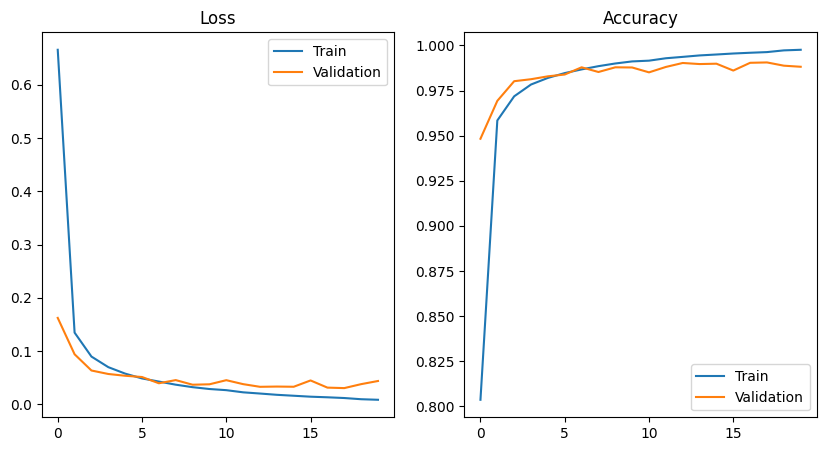

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

In [ ]:
# prediction result on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("測試資料 loss: %f" %test_loss)
print("測試資料準確率: %f" %test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9851 - loss: 0.0579
測試資料 loss: 0.043789
測試資料準確率: 0.988200


## 5: 視覺化預測結果

在這部分，我們提供簡單的視覺化方法來呈現神經網路的輸入與輸出結果

In [ ]:
def visulization(idx=0):
    # Random pick one data from training set
    # idx = np.random.randint(X_train.shape[0])
    sample_x = X_test[idx]
    sample_y = y_test[idx]
    # Predict the class of random data
    predict_y = model.predict(X_test[idx:idx+1]).squeeze()
    predict_label = predict_y.argmax()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # Plot raw image
    ax1.imshow(sample_x[:, :, 0], 'gray_r')
    ax1.set_title("Image Label: %d" %sample_y.argmax())

    # Plot prediction probability of each classes
    ax2.barh(np.arange(10), predict_y)
    ax2.patches[predict_label].set_facecolor('Red')
    ax2.set_title("Prediction Result: %d" %predict_label);
    if sample_y.argmax()==predict_y.argmax():
        print("預測正確!")
        return True
    else:
        print("預測失敗QQ")
        return False

In [ ]:
X_test.shape[0]

10000

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
預測正確!


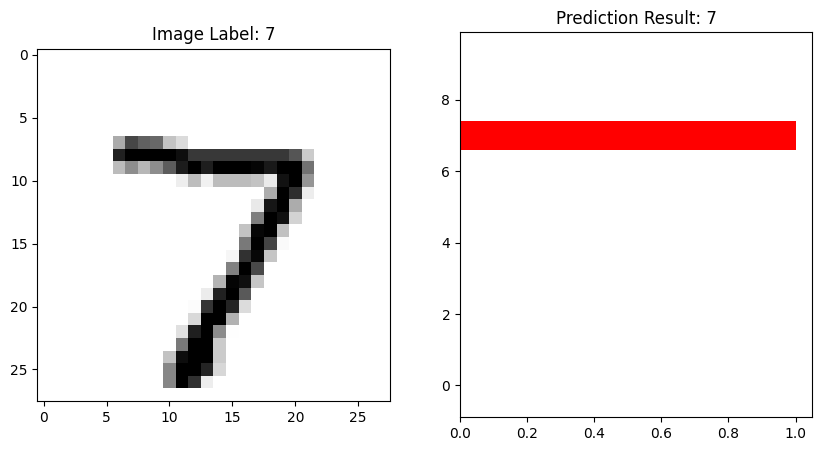

interactive(children=(BoundedIntText(value=0, description='idx', max=9999), Output()), _dom_classes=('widget-i…

In [ ]:
checkI = 0
while checkI < X_test.shape[0] and visulization(checkI):
    checkI += 1
interact(visulization, idx=BoundedIntText(value=checkI, min=0, max=X_test.shape[0]-1));  #value=5566

# Task
Evaluate the current model's training and testing performance (accuracy and loss), measure its inference time on `X_test`, and display its architecture. Then, optimize the model by changing the optimizer to Adam, retrain it, and re-evaluate its performance (accuracy, loss, and inference time). Finally, compare both models' performance metrics and discuss the improvements.

## Summarize Current Model Performance

### Subtask:
彙整並呈現模型在訓練和測試階段的準確度 (accuracy) 和損失 (loss) 指標。這將提供模型目前預測性能的概覽。


**Reasoning**:
To summarize the model performance, I will print the training, validation, and test loss and accuracy metrics using the `training_history` object and the previously calculated `test_loss` and `test_accuracy` variables.



In [ ]:
print(f"Training Loss (last epoch): {training_history.history['loss'][-1]:.4f}")
print(f"Training Accuracy (last epoch): {training_history.history['categorical_accuracy'][-1]:.4f}")
print(f"Validation Loss (last epoch): {training_history.history['val_loss'][-1]:.4f}")
print(f"Validation Accuracy (last epoch): {training_history.history['val_categorical_accuracy'][-1]:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Loss (last epoch): 0.0085
Training Accuracy (last epoch): 0.9976
Validation Loss (last epoch): 0.0438
Validation Accuracy (last epoch): 0.9882
Test Loss: 0.0438
Test Accuracy: 0.9882


## Measure Model Inference Time

### Subtask:
新增程式碼以測量訓練好的模型在整個測試資料集 (X_test) 上進行預測所需的時間。這將提供模型推論效率的實證測量。


**Reasoning**:
To measure the inference time, I will import the `time` module, record the start time, make predictions on `X_test` using `model.predict()`, record the end time, calculate the difference, and then print the result.



In [ ]:
import time

start_time = time.time()
predictions = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print(f"Inference time: {inference_time:.4f} seconds")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Inference time: 2.6020 seconds


**Reasoning**:
To provide a comprehensive overview of the current model, it's essential to display its architecture. This will show the layers, output shapes, and the number of parameters, which is a crucial step before optimizing the model.



In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 400)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 120)            │        24,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440,536 (1.68 MB)

 Trainable params: 440,534 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Optimize Model with Adam Optimizer

### Subtask:
優化模型，將優化器從 SGD 變更為 Adam，然後重新訓練模型，並重新評估其性能（準確度、損失和推論時間）。

**Reasoning**:
To optimize the model with the Adam optimizer, I need to first re-instantiate the model with the same architecture as the previous one. This ensures a clean slate for training with the new optimizer.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Re-instantiate the model with the same architecture
model_adam = Sequential()
model_adam.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model_adam.add(MaxPool2D())
model_adam.add(Conv2D(32, (3, 3), activation='relu'))
model_adam.add(MaxPool2D())
model_adam.add(Flatten())
model_adam.add(Dense(units=400, activation='relu'))
model_adam.add(Dense(units=200, activation='relu'))
model_adam.add(Dense(units=120, activation='relu'))
model_adam.add(Dense(units=84, activation='relu'))
model_adam.add(Dense(units=10, activation='softmax'))

print("Model architecture for Adam optimizer re-created.")

Model architecture for Adam optimizer re-created.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Reasoning**:
The previous code block produced a `UserWarning` about passing `input_shape` to `Conv2D` within a `Sequential` model. To fix this, I will explicitly add an `Input` layer as the first layer of the `Sequential` model and remove the `input_shape` argument from the first `Conv2D` layer, as recommended by the warning.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input

# Re-instantiate the model with the same architecture, fixing the UserWarning
model_adam = Sequential()
model_adam.add(Input(shape=(28, 28, 1))) # Add an explicit Input layer
model_adam.add(Conv2D(64, (3, 3), activation='relu')) # Removed input_shape from Conv2D
model_adam.add(MaxPool2D())
model_adam.add(Conv2D(128, (3, 3), activation='relu'))
model_adam.add(MaxPool2D())
model_adam.add(Conv2D(256, (3, 3), activation='relu'))
model_adam.add(MaxPool2D())
model_adam.add(Flatten())
model_adam.add(Dense(units=800, activation='relu'))
model_adam.add(Dense(units=400, activation='relu'))
model_adam.add(Dense(units=200, activation='relu'))
model_adam.add(Dense(units=120, activation='relu'))
model_adam.add(Dense(units=84, activation='relu'))
model_adam.add(Dense(units=10, activation='softmax'))
model_adam.summary()

print("Model architecture for Adam optimizer re-created, with Input layer.")

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 800)            │       205,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 400)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 120)            │        24,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010,998 (3.86 MB)

 Trainable params: 1,010,998 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

Model architecture for Adam optimizer re-created, with Input layer.


**Reasoning**:
With the `model_adam` architecture now correctly defined, the next step is to compile it using the Adam optimizer, as required by the subtask. I will set the loss function to 'categorical_crossentropy' and metrics to 'categorical_accuracy', consistent with the previous model's compilation.



In [ ]:
from tensorflow.keras.optimizers import Adam

model_adam.compile(loss='categorical_crossentropy',
              optimizer=Adam(), # Changed optimizer to Adam
              metrics=['categorical_accuracy'])

print("Model_adam compiled with Adam optimizer.")

Model_adam compiled with Adam optimizer.


**Reasoning**:
Now that `model_adam` is compiled, I will train it using the `X_train` and `y_train` datasets, validating its performance with `X_test` and `y_test`. I'll keep the batch size and number of epochs consistent with the previous model's training to allow for a fair comparison.



In [ ]:
training_history_adam = model_adam.fit(X_train, y_train,    batch_size=64,
                             epochs=50,
                             validation_data=(X_test, y_test),
                             callbacks=[EarlyStopping(monitor='val_loss', mode='auto', patience=50)]
                                       )
print("Model_adam trained successfully.")

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - categorical_accuracy: 0.8168 - loss: 0.5363 - val_categorical_accuracy: 0.9788 - val_loss: 0.0766
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.9775 - loss: 0.0792 - val_categorical_accuracy: 0.9827 - val_loss: 0.0636
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.9858 - loss: 0.0501 - val_categorical_accuracy: 0.9806 - val_loss: 0.0719
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.9882 - loss: 0.0434 - val_categorical_accuracy: 0.9834 - val_loss: 0.0678
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.9910 - loss: 0.0347 - val_categorical_accuracy: 0.9848 - val_loss: 0.0586
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.9911 - loss: 0.0333 - val_categorical_accuracy: 0.9871 - val_loss: 0.0623
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.9923 - l

In [ ]:
training_history_adam_2 = model_adam.fit(X_train, y_train,    batch_size=64,
                             epochs=100,
                             validation_data=(X_test, y_test)
                             )
print("Model_adam trained successfully.")

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.9993 - loss: 0.0033 - val_categorical_accuracy: 0.9905 - val_loss: 0.1960
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.9985 - loss: 0.0107 - val_categorical_accuracy: 0.9900 - val_loss: 0.1269
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.9991 - loss: 0.0069 - val_categorical_accuracy: 0.9899 - val_loss: 0.1065
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - categorical_accuracy: 0.9994 - loss: 0.0041 - val_categorical_accuracy: 0.9891 - val_loss: 0.1747
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.9987 - loss: 0.0092 - val_categorical_accuracy: 0.9893 - val_loss: 0.1287
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.9982 - loss: 0.0078 - val_categorical_accuracy: 0.9905 - val_loss: 0.1170
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.99

In [ ]:
training_history_adam_3 = model_adam.fit(X_train, y_train,    batch_size=50,
                             epochs=100,
                             validation_data=(X_test, y_test)
                             )
print("Model_adam trained successfully.")

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - categorical_accuracy: 0.9997 - loss: 0.0015 - val_categorical_accuracy: 0.9901 - val_loss: 0.3707
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.9964 - loss: 0.0269 - val_categorical_accuracy: 0.9865 - val_loss: 0.1982
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.9986 - loss: 0.0068 - val_categorical_accuracy: 0.9887 - val_loss: 0.2257
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.9997 - loss: 0.0020 - val_categorical_accuracy: 0.9896 - val_loss: 0.3452
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.9995 - loss: 0.0033 - val_categorical_accuracy: 0.9893 - val_loss: 0.3092
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.9995 - loss: 0.0045 - val_categorical_accuracy: 0.9884 - val_loss: 0.2600
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_

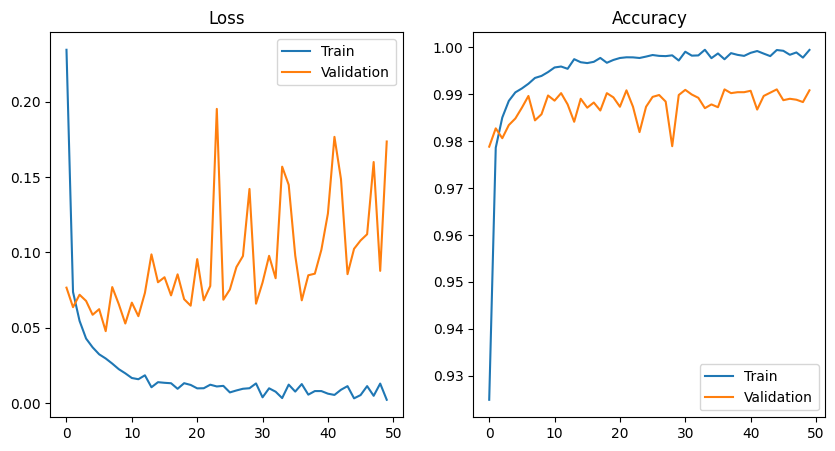

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history_adam.history['loss'])
plt.plot(training_history_adam.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history_adam.history['categorical_accuracy'])
plt.plot(training_history_adam.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

### Merging Training Histories

To combine `training_history_adam` and `training_history_adam_2`, we'll create a new dictionary where each metric's list is concatenated. This allows for a continuous view of the training process across both `fit` calls.

In [ ]:
#def merge_training_histories(history_, history2):  #未完成，可單獨執行內函式程式碼
merged_training_history = {}

# Get all unique keys from both history objects
history_keys = set(training_history_adam.history.keys()) | set(training_history_adam_2.history.keys())

for key in history_keys:
    if key in training_history_adam.history and key in training_history_adam_2.history:
        merged_training_history[key] = training_history_adam.history[key] + training_history_adam_2.history[key]
    elif key in training_history_adam.history:
        merged_training_history[key] = training_history_adam.history[key]
    elif key in training_history_adam_2.history:
        merged_training_history[key] = training_history_adam_2.history[key]

print("Merged training history keys:", merged_training_history.keys())
print("Length of merged loss history:", len(merged_training_history['loss']))


Merged training history keys: dict_keys(['val_categorical_accuracy', 'val_loss', 'loss', 'categorical_accuracy'])
Length of merged loss history: 150


### Plotting Merged Training History

Now we can plot the combined training history to visualize the overall progress of the model trained with the Adam optimizer over all epochs.

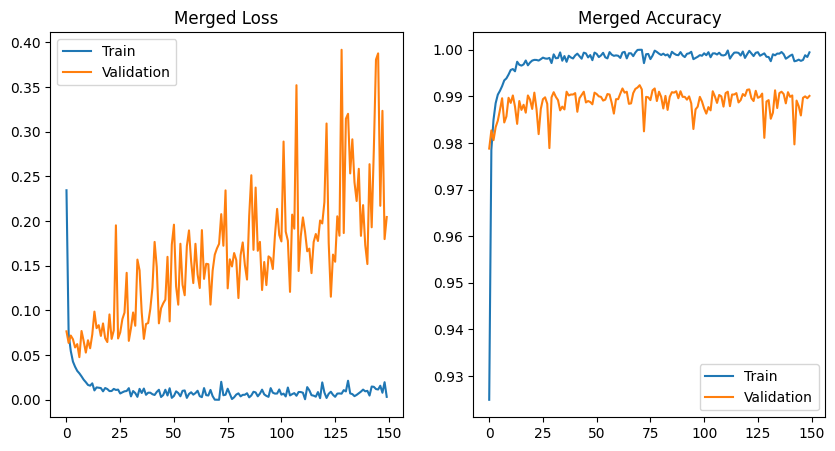

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(merged_training_history['loss'])
plt.plot(merged_training_history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Merged Loss")

plt.subplot(1, 2, 2)
plt.plot(merged_training_history['categorical_accuracy'])
plt.plot(merged_training_history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Merged Accuracy")
plt.show()


In [ ]:
# prediction result on testing data
test_loss, test_accuracy = model_adam.evaluate(X_test, y_test)
print("測試資料 loss: %f" %test_loss)
print("測試資料準確率: %f" %test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9878 - loss: 0.2851
測試資料 loss: 0.204598
測試資料準確率: 0.990100


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define the path to save the model in Google Drive
model_save_path = '/content/drive/MyDrive/model_checkpoints'

# Create the directory if it doesn't exist
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)

# Save the model
#model_adam.save(os.path.join(model_save_path, 'my_model_adam.h5'))
model_adam.save('my_model_adam.keras')
print(f"Model saved to {os.path.join(model_save_path, 'my_model_adam.keras')}")

Model saved to /content/drive/MyDrive/model_checkpoints/my_model_adam.keras
